In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v0", is_slippery=True).env
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [2]:
env.action_space

Discrete(4)

In [3]:
env.observation_space

Discrete(16)

In [4]:
env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

In [5]:
env.step(2)
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


In [6]:
env.reset()
for t in range(10):
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)
  print(t, observation, reward, done)
  env.render()

0 4 0.0 False
  (Down)
SFFF
FHFH
FFFH
HFFG
1 8 0.0 False
  (Left)
SFFF
FHFH
FFFH
HFFG
2 12 0.0 True
  (Down)
SFFF
FHFH
FFFH
HFFG
3 12 0 True
  (Up)
SFFF
FHFH
FFFH
HFFG
4 12 0 True
  (Right)
SFFF
FHFH
FFFH
HFFG
5 12 0 True
  (Up)
SFFF
FHFH
FFFH
HFFG
6 12 0 True
  (Right)
SFFF
FHFH
FFFH
HFFG
7 12 0 True
  (Left)
SFFF
FHFH
FFFH
HFFG
8 12 0 True
  (Up)
SFFF
FHFH
FFFH
HFFG
9 12 0 True
  (Up)
SFFF
FHFH
FFFH
HFFG


In [7]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [9]:
n_states

16

In [10]:
n_actions

4

In [11]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [13]:
def initialize_policy(n_states, n_actions):
  
    policy = np.zeros(shape=(n_states, n_actions)) +  1/n_actions
    
    return policy

policy = initialize_policy(n_states, n_actions)

def generate_session(env, policy, t_max = 5000):
  
  observations, actions = [], []
  total_reward = 0.
  observation = env.reset()
  
  for t in range(t_max):
    
    action = np.random.choice(n_actions, p = policy[observation])

    new_observation, reward, done, info = env.step(action)

    observations.append(observation)
    actions.append(action)
    total_reward += reward

    observation = new_observation
    if done:
        break

  return observations, actions, total_reward

In [14]:
def select_elites(observations_batch, actions_batch, total_reward_batch, percentile):

    reward_threshold = np.percentile(total_reward_batch, percentile)

    elite_observations = []
    elite_actions = []

    for i in range(len(total_reward_batch)):
      if total_reward_batch[i] > reward_threshold:
        elite_observations += (observations_batch[i])
        elite_actions += (actions_batch[i])
        
    return elite_observations, elite_actions

In [15]:
sessions = [generate_session(env, policy) for i in range(3)]
observations_batch, actions_batch, total_reward_batch = zip(*sessions)

In [16]:
print(sessions)
print(observations_batch)
print(actions_batch)
print(total_reward_batch)

[([0, 4, 0, 0, 0, 1], [1, 2, 0, 2, 2, 0], 0.0), ([0, 0, 0, 0, 4], [0, 2, 3, 2, 1], 0.0), ([0, 0, 4, 4], [0, 0, 0, 3], 0.0)]
([0, 4, 0, 0, 0, 1], [0, 0, 0, 0, 4], [0, 0, 4, 4])
([1, 2, 0, 2, 2, 0], [0, 2, 3, 2, 1], [0, 0, 0, 3])
(0.0, 0.0, 0.0)


In [17]:
percentile = 80
elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)

In [18]:
def update_policy(elite_observations, elite_actions):

  policy_updated = policy
  elite_observations_unique = set(elite_observations)
  actions_count = {observation:[0]*n_actions for observation in elite_observations_unique}
  
  for observation, action in zip(elite_observations, elite_actions):
    actions_count[observation][action]+=1

  for observation in elite_observations_unique:
    policy_updated[observation] = np.array(actions_count[observation] / np.sum(actions_count[observation]))

  return policy_updated

In [19]:
policy_updated = update_policy(elite_observations,elite_actions)
print(policy_updated)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [20]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, precentile):

  mean_reward = np.mean(rewards_batch)
  treshold = np.percentile(rewards_batch, percentile)
  log.append([mean_reward, treshold])

  plt.figure(figsize=[8, 4])
  plt.plot(list(zip(*log))[0], label = "Mean reward")
  plt.plot(list(zip(*log))[1], label = "Reward treshold")
  plt.legend()
  plt.grid()

  clear_output(True)
  print("mean reward:", mean_reward)
  print("treshold:", treshold)
  plt.show()

In [21]:
env.reset()
policy = initialize_policy(n_states, n_actions)

mean reward: 0.22666666666666666
treshold: 0.0


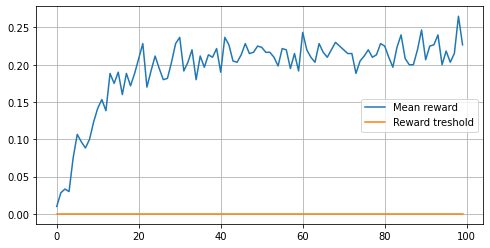

In [22]:
n_sessions = 600
percentile = 50
learning_rate = 0.4

log = []

for i in range(100):

  sessions = [generate_session(env, policy, t_max=5000) for j in range(n_sessions)]

  observations_batch, actions_batch, total_reward_batch = zip(*sessions)

  elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)

  policy_updated = update_policy(elite_observations, elite_actions)

  policy = learning_rate * policy_updated + (1 - learning_rate)* policy

  show_progress(total_reward_batch, log, percentile)

In [23]:
policy

array([[0.12676056, 0.07746479, 0.79577465, 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.03773585, 0.96226415, 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      ]])

In [35]:
observation = env.reset()

for t in range(100):

  action = np.random.choice(n_actions, p = policy[observation])
  
  new_observation, reward, done, info = env.step(action)

  observation = new_observation  


  print(t, done)
  env.render()

  if done:
      break

0 False
  (Right)
SFFF
FHFH
FFFH
HFFG
1 False
  (Up)
SFFF
FHFH
FFFH
HFFG
2 False
  (Down)
SFFF
FHFH
FFFH
HFFG
3 False
  (Up)
SFFF
FHFH
FFFH
HFFG
4 False
  (Right)
SFFF
FHFH
FFFH
HFFG
5 False
  (Right)
SFFF
FHFH
FFFH
HFFG
6 False
  (Right)
SFFF
FHFH
FFFH
HFFG
7 False
  (Right)
SFFF
FHFH
FFFH
HFFG
8 False
  (Left)
SFFF
FHFH
FFFH
HFFG
9 False
  (Left)
SFFF
FHFH
FFFH
HFFG
10 False
  (Down)
SFFF
FHFH
FFFH
HFFG
11 True
  (Down)
SFFF
FHFH
FFFH
HFFG
